# TBDB 5000 Analysis Final Project
by sl994, js2888, jc2473

## Predicting Movie Revenue

### The Problem Statement: 
#### Predicting revenue based on budget, genre, release date, and production company.

### Hypothesis: 
#### The actual revenue of Once Upon a Time in Hollywood and our predicted revenue of a movie will have less than 10% of error. 

Note: 
Once Upon a Time In Hollywood is a movie with genres of Drama/Thriller. It is not included in the original dataset that we used to train our Linear Regression Model. We will use the value of revenue that this movie generated and compare that value with the value of predicted revenue we got from running this movie data in our model. 


In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
df = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

#### Preprocessing and Manipulation 
- We trimmed columns and dropped unrelated values.
- Chosen columns: budget, genre, release date, and production company. (We decided to include release date because movie distribution companies strategically decide on which data to release the film on theatres.)
- As we had enough datapoints, we trimmed rows, which the revenue was not recorded.

In [4]:
df = df.loc[df['revenue'] != 0]
df=df.drop('homepage',axis=1)
df=df.drop('id',axis=1)
df=df.drop('keywords',axis=1)
df=df.drop('original_language',axis=1)
df=df.drop('original_title',axis=1)
df=df.drop('overview',axis=1)
df=df.drop('popularity',axis=1)
df=df.drop('production_countries',axis=1)
df=df.drop('runtime',axis=1)
df=df.drop('spoken_languages',axis=1)
df=df.drop('status',axis=1)
df=df.drop('tagline',axis=1)
df=df.drop('title',axis=1)
df=df.drop('vote_average',axis=1)
df=df.drop('vote_count',axis=1)
df.columns

Index(['budget', 'genres', 'production_companies', 'release_date', 'revenue'], dtype='object')

#### Visualization #1 (Scatterplot of Budget vs. Revenue) 
As you can see from the graph, the budget is positively correlated with revenue. While this is not absolute for few cases, it is the general trend in terms of budget vs. revenue, as one can easily imagine. 

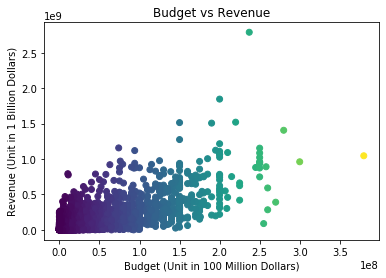

In [5]:
plt.scatter(df['budget'],df['revenue'],c = df['budget'].ravel())
plt.title('Budget vs Revenue')
plt.xlabel('Budget (Unit in 100 Million Dollars)')
plt.ylabel('Revenue (Unit in 1 Billion Dollars)')
plt.show()

#### Data Collecting #1 (Genres)
As the data in 'genres' column are string data, we first created a new dataframe that counted the repetition of each data within the dataset, stored the respectivel mean revenue of each genre. Lastly, we created a color data column to color code each genres with specific colors to distinguish one from another in the bar graphs

In [6]:
genres = []
count = []
revenue = []
color = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#800000', '#aaffc3', '#808000', '#808080', '#000075', '#ffd8b1']
for i,x in df.iterrows():
    gr = x['genres']
    for y in range(0,gr.count("name")):
        gr = gr[gr.index("name")+8:]
        genre = gr[:gr.index("\"")]
        if genre not in genres:
            genres.append(genre)
            count.append(1)
            revenue.append(x['revenue'])
        else:
            count[genres.index(genre)] += 1
            revenue[genres.index(genre)] += x['revenue']
genres_data = pd.DataFrame({
                                'genres': pd.Series(genres),
                                'count': pd.Series(count),
                                'mean revenue': pd.Series(revenue)/pd.Series(count),
                                'color code':pd.Series(color)
                            })

#### Visualization #2 (Bar graph of Frequency of Movie Genres) 
As you can see from the graph, Drama, Comedy, and Thriller are top three movie genres in this data set.

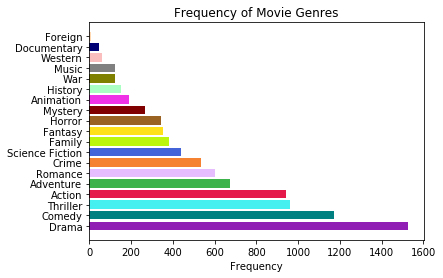

In [7]:
count_sort = genres_data.sort_values(by = 'count', ascending = False)
plt.barh(np.arange(len(genres)), count_sort['count'], align = 'center',color = count_sort['color code'])
plt.yticks(np.arange(len(genres)), count_sort['genres'])
plt.xlabel('Frequency')
plt.title('Frequency of Movie Genres')
plt.show()

#### Visualization #3 (Bar Graph of Average Revenue of Different Movie Genres)
This graph demonstrates that Animation, Advanture and Fantasy generate the most average revenuve among the movie genres. 

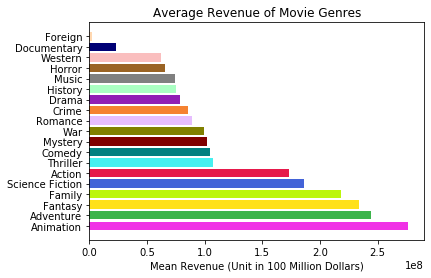

In [8]:
revenue_sort = genres_data.sort_values(by = 'mean revenue', ascending = False)
plt.barh(np.arange(len(genres)), revenue_sort['mean revenue'], align = 'center', color = revenue_sort['color code'])
plt.yticks(np.arange(len(genres)), revenue_sort['genres'])
plt.xlabel('Mean Revenue (Unit in 100 Million Dollars)')
plt.title('Average Revenue of Movie Genres')
plt.show()

#### One Hot Encoding #1 (Genres) 
In order to perform linear regression with incorporating the genres column data, we one hot encoded them. In detail, we created columns for each genres in our original dataframe, and marked 1 for each cell of the column if the movie of the respective row included the genre.

In [9]:
df['Drama'] = 0
df['Comedy'] = 0
df['Thriller'] = 0
df['Action'] = 0
df['Romance'] = 0
df['Adventure'] = 0
df['Crime'] = 0
df['Science Fiction'] = 0
df['Horror'] = 0
df['Family'] = 0
df['Fantasy'] = 0
df['Mystery'] = 0
df['Animation'] = 0
df['History'] = 0
df['Music'] = 0
df['War'] = 0
df['Documentary'] = 0
df['Western'] = 0
df['Foreign'] = 0

for i,x in df.iterrows():
    if "Drama" in x['genres']:
        df.at[i,'Drama'] = 1
    if "Comedy" in x['genres']:
        df.at[i,'Comedy'] = 1
    if "Thriller" in x['genres']:
        df.at[i,'Thriller'] = 1
    if "Action" in x['genres']:
        df.at[i,'Action'] = 1
    if "Romance" in x['genres']:
        df.at[i,'Romance'] = 1
    if "Adventure" in x['genres']:
        df.at[i,'Adventure'] = 1
    if "Crime" in x['genres']:
        df.at[i,'Crime'] = 1
    if "Science Fiction" in x['genres']:
        df.at[i,'Science Fiction'] = 1
    if "Horror" in x['genres']:
        df.at[i,'Horror'] = 1
    if "Family" in x['genres']:
        df.at[i,'Family'] = 1
    if "Fantasy" in x['genres']:
        df.at[i,'Fantasy'] = 1
    if "Mystery" in x['genres']:
        df.at[i,'Mystery'] = 1
    if "Animation" in x['genres']:
        df.at[i,'Animation'] = 1
    if "History" in x['genres']:
        df.at[i,'History'] = 1
    if "Music" in x['genres']:
        df.at[i,'Music'] = 1
    if "War" in x['genres']:
        df.at[i,'War'] = 1
    if "Documentary" in x['genres']:
        df.at[i,'Documentary'] = 1
    if "Western" in x['genres']:
        df.at[i,'Western'] = 1
    if "Foreign" in x['genres']:
        df.at[i,'Foreign'] = 1
df = df.drop('genres', axis = 1)

#### Data Collecting #2 (Production Companies)
Same as the genres column, we did the same to the production_companies column. However, it turned out that there were more than 3000 different production companies in the data, so we had to filter out the production companies that produced less than 50 movies.

In [10]:
pc_list = []
count = []
revenue = []
color = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#800000', '#aaffc3', '#808000', '#808080', '#000075', '#ffd8b1']
for i,x in df.iterrows():
    pc = x['production_companies']
    for y in range(0,pc.count("name")):
        pc = pc[pc.index("name")+8:]
        production_company = pc[:pc.index("\"")]
        if production_company not in pc_list:
            pc_list.append(production_company)
            count.append(1)
            revenue.append(x['revenue'])
        else:
            count[pc_list.index(production_company)] += 1
            revenue[pc_list.index(production_company)] += x['revenue']
pc_data = pd.DataFrame({
                             'pc_list': pd.Series(pc_list),
                             'count': pd.Series(count),
                             'mean revenue': pd.Series(revenue)/pd.Series(count),
                        })
pc_data =pc_data.loc[(pc_data['count']>=50)]
pc_data['color code'] = color

#### Visualization #4 (Bar Graph of Frequency of Production Companies)  
This bar graph counts the number of movies each production companies made in the dataset. As you can see, Warner Bros., Universal Pictures, and Paramount Pictures are the top three Production Companies. 

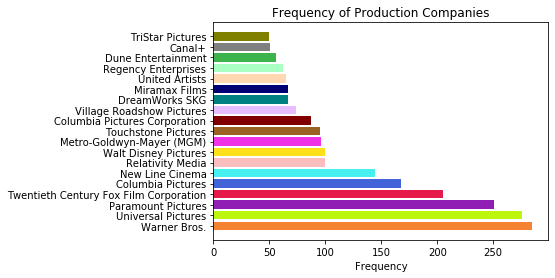

In [11]:
count_sort = pc_data.sort_values(by = 'count', ascending = False)
plt.barh(np.arange(len(count_sort['pc_list'])), count_sort['count'], align = 'center',color = count_sort['color code'])
plt.yticks(np.arange(len(count_sort['pc_list'])), count_sort['pc_list'])
plt.xlabel('Frequency')
plt.title('Frequency of Production Companies')
plt.show()

#### Visualization #5 (Bar Graph of Average Revenue of Production Companies) 
As you can see, those top three production companies that  made the most movies from the Visualization #4 do not match with the companies that made the most revenue. Instead, Walt Disney Pictures, Dune Entertainment, and DreamWorks SKG made the most average revenue, based on this graph. These companies produced approximately 100 movies out of those 5000 released movies in the dataset. Therefore, we can conclude that the amount of movies that a production company produces is not necessarily correlated to a higher revenue. 

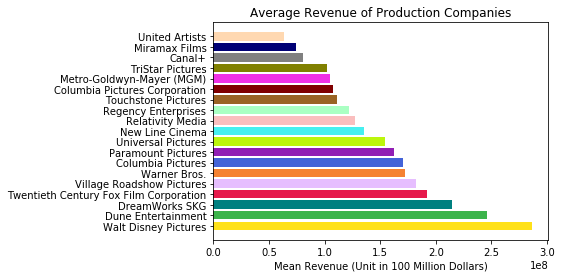

In [12]:
revenue_sort = pc_data.sort_values(by = 'mean revenue', ascending = False)
plt.barh(np.arange(len(revenue_sort['pc_list'])), revenue_sort['mean revenue'], align = 'center',color = revenue_sort['color code'])
plt.yticks(np.arange(len(revenue_sort['pc_list'])), revenue_sort['pc_list'])
plt.xlabel('Mean Revenue (Unit in 100 Million Dollars)')
plt.title('Average Revenue of Production Companies')
plt.show()

#### One Hot Encoding #2 (Production Companies) 
Same as what we did for the genres, we performed one hot encoding for the produciton companies data

In [13]:
df['Twentieth Century Fox Film Corporation'] = 0
df['Dune Entertainment'] = 0
df['Walt Disney Pictures'] = 0
df['Columbia Pictures'] = 0
df['Warner Bros.'] = 0
df['Paramount Pictures'] = 0
df['New Line Cinema'] = 0
df['Metro-Goldwyn-Mayer (MGM)'] = 0
df['Universal Pictures'] = 0
df['Relativity Media'] = 0
df['DreamWorks SKG'] = 0
df['Village Roadshow Pictures'] = 0
df['Touchstone Pictures'] = 0
df['Columbia Pictures Corporation'] = 0
df['Regency Enterprises'] = 0
df['Canal+'] = 0
df['Miramax Films'] = 0
df['United Artists'] = 0
df['TriStar Pictures'] = 0

for i,x in df.iterrows():
    if "Twentieth Century Fox Film Corporation" in x['production_companies']:
        df.at[i,'Twentieth Century Fox Film Corporation'] = 1
    if "Dune Entertainment" in x['production_companies']:
        df.at[i,'Dune Entertainment'] = 1
    if "Walt Disney Pictures" in x['production_companies']:
        df.at[i,'Walt Disney Pictures'] = 1
    if "Columbia Pictures" in x['production_companies']:
        df.at[i,'Columbia Pictures'] = 1
    if "Warner Bros." in x['production_companies']:
        df.at[i,'Warner Bros.'] = 1
    if "Paramount Pictures" in x['production_companies']:
        df.at[i,'Paramount Pictures'] = 1
    if "New Line Cinema" in x['production_companies']:
        df.at[i,'New Line Cinema'] = 1
    if "Metro-Goldwyn-Mayer (MGM)" in x['production_companies']:
        df.at[i,'Metro-Goldwyn-Mayer (MGM)'] = 1
    if "Universal Pictures" in x['production_companies']:
        df.at[i,'Universal Pictures'] = 1
    if "Relativity Media" in x['production_companies']:
        df.at[i,'Relativity Media'] = 1
    if "DreamWorks SKG" in x['production_companies']:
        df.at[i,'DreamWorks SKG'] = 1
    if "Village Roadshow Pictures" in x['production_companies']:
        df.at[i,'Village Roadshow Pictures'] = 1
    if "Touchstone Pictures" in x['production_companies']:
        df.at[i,'Touchstone Pictures'] = 1
    if "Columbia Pictures Corporation" in x['production_companies']:
        df.at[i,'Columbia Pictures Corporation'] = 1
    if "Regency Enterprises" in x['production_companies']:
        df.at[i,'Regency Enterprises'] = 1
    if "Canal+" in x['production_companies']:
        df.at[i,'Canal+'] = 1
    if "Miramax Films" in x['production_companies']:
        df.at[i,'Miramax Films'] = 1
    if "United Artists" in x['production_companies']:
        df.at[i,'United Artists'] = 1
    if "TriStar Pictures" in x['production_companies']:
        df.at[i,'TriStar Pictures'] = 1
df = df.drop('production_companies', axis = 1)

#### Data Collecting #3 (Release Date)
Since the release date column is a string dataset, we converted it to a numerical data point which equals to month+day/31.

In [14]:
df['release_date_numerical'] = 0.0
for i,x in df.iterrows():
    date = x['release_date']
    num = float(date[5:7])+float(date[8:10])/31
    df.at[i, 'release_date_numerical'] = num
df = df.drop('release_date', axis = 1)

### Model #1 (Linear Regression model) 
#### Why? 
We wanted to see if there is a correlation between these factors (budget, genres, and production companies) and  revenue. Then, we want to compare our predicted revenue with that of Once Upon a Time in Hollywood revenue. If the error is less than 10%, our hypothesis is correct.

In [15]:
input_features = df.drop('revenue',axis = 1)
output_feature = df['revenue']

In [16]:
model = LinearRegression()
x_tr, x_te, y_tr, y_te = train_test_split(input_features,output_feature, test_size=0.001,random_state=42)
model.fit(x_tr, y_tr)
predictions = model.predict(x_te)
print("Score for our Linear Regression Model: ", model.score(x_te, y_te))

Score for our Linear Regression Model:  0.7485659468755047


This gives us a linear equation of <br>
revenue = model.coef_ • ['budget', 'Drama', 'Comedy', 'Thriller', 'Action', 'Romance',
       'Adventure', 'Crime', 'Science Fiction', 'Horror', 'Family', 'Fantasy',
       'Mystery', 'Animation', 'History', 'Music', 'War', 'Documentary',
       'Western', 'Foreign', 'Twentieth Century Fox Film Corporation',
       'Dune Entertainment', 'Walt Disney Pictures', 'Columbia Pictures',
       'Warner Bros.', 'Paramount Pictures', 'New Line Cinema',
       'Metro-Goldwyn-Mayer (MGM)', 'Universal Pictures', 'Relativity Media',
       'DreamWorks SKG', 'Village Roadshow Pictures', 'Touchstone Pictures',
       'Columbia Pictures Corporation', 'Regency Enterprises', 'Canal+',
       'Miramax Films', 'United Artists', 'TriStar Pictures,'release_date_numerical']
       
Below, we fetched the data of movie 'Once Upon A Time in Hollywood' from https://pro.imdb.com/title/tt7131622/companycreditswhich. The movie collected a gross revenue of $371,950,710 worldwide.

In [17]:
coeff = model.coef_
target_movie_data = [90000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.84]
predicted_rev = round(coeff.dot(target_movie_data),2)
print("Our predicted revenue of Once Upon a Time in Hollywood is $" + str(predicted_rev))

Our predicted revenue of Once Upon a Time in Hollywood is $229259583.29


In [18]:
perc_err = round((371950710-coeff.dot(target_movie_data))/371950710*100,2)
print("However, the percentage error is " + str(perc_err) + "%")

However, the percentage error is 38.36%


#### Conclusion 
Through our linear regression model that our prediction is not as accurate as we expected. We can conclude that our hypothesis of having an error less than 10% is wrong.

Our team reflected on why we got a higher error than we expected. We concluded that the genres of movie data standards in Kaggle are probably not the same as "Once Upon A Time In Hollywood" in IMDB. Thus, the difference in standards of deciding genres could have resulted in a higher error percentage. 

It is also important to note that there are many other factors that could have impacted our data model, such as actors, directors, advertising, and competing movies at the time. Because we did not take these factors into account, given the limtied information we had in our dataset, it is why our error percentage was higher than our hypothesis. 

Also, even the most renowned data scientists cannot predict a movie's revenue perfectly; thus, it makes sense that given the limited information we found on the web, it may have been difficult to predict the revenue without such a huge error percentage. 

### Model #2 (Ridge Regression model) 
#### Why? 
Based on https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf, Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. It helps preventing overfitting. 

In [19]:
from sklearn.linear_model import Ridge

x_tr, x_te, y_tr, y_te = train_test_split(input_features,output_feature, test_size=0.001,random_state=42)
model = Ridge(alpha=10)
model.fit(x_tr, y_tr)
train_sc= model.score(x_tr,y_tr)
test_sc=model.score(x_te,y_te)
print("train accuracy is ", train_sc)
print("test accuracy is ", test_sc)

train accuracy is  0.5220909448477007
test accuracy is  0.748435758608192


/Users/JunChang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23762e-18): result may not be accurate.
  overwrite_a=True).T
